#Imports

In [655]:
import numpy as np
import glob
import os
from PIL import Image
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from keras.utils.np_utils import to_categorical

#Loading Data

In [270]:
bd1 = np.load("/content/drive/MyDrive/dataset/body.npy")
rh1 = np.load("/content/drive/MyDrive/dataset/right_hand.npy")
lh1 = np.load("/content/drive/MyDrive/dataset/left_hand.npy")
rf1 = np.load("/content/drive/MyDrive/dataset/right_foot.npy")
lf1 = np.load("/content/drive/MyDrive/dataset/left_foot.npy")

In [271]:
print(bd1.shape)
print(rh1.shape)
print(lh1.shape)
print(rf1.shape)
print(lf1.shape)

(56428, 300, 15)
(56428, 300, 18)
(56428, 300, 18)
(56428, 300, 12)
(56428, 300, 12)


#Labels

In [512]:
label = np.load("/content/drive/MyDrive/dataset/label60.npy")
cat_target = to_categorical(label)
cat_target = np.delete(cat_target, 0, 1)
print(cat_target.shape)

(56428, 60)


In [622]:
label_list = ['drink-water', 'eat-meal', 'brush-teeth', 'brush-hair', 'drop',
              'pick-up', 'throw', 'sit-down', 'stand-up', 'clapping', 'reading',
              'writing', 'tear-up-paper', 'put-on-jacket', 'take-off-jacket',
              'put-on-a-shoe', 'take-off-a-shoe', 'put-on-glasses', 'take-off-glasses',
              'put-on-a-hat-cap', 'take-off-a-hat-cap', 'cheer-up', 'hand-waving',
              'kicking-something', 'reach-into-pocket', 'hopping', 'jump-up',
              'phone-call', 'play-with-phone-tablet', 'type-on-a-keyboard',
              'point-to-something', 'taking-a-selfie', 'check-time-(from watch)',
              'rub-two-hands', 'nod-head-bow', 'shake-head', 'wipe-face', 'salute',
              'put-palms-together', 'cross-hands-in-front', 'sneeze-cough',
              'staggering', 'falling-down', 'headache', 'chest-pain', 'back-pain',
              'neck-pain', 'nausea-vomiting', 'fan-self', 'punch-slap', 'kicking',
              'pushing', 'pat-on-back', 'point-finger', 'hugging', 'giving-object',
              'touch-pocket', 'shaking-hands', 'walking-towards', 'walking-apart']


In [604]:
print(f"The 100th data:", "\n")
print(f"label:{int(label[100])} => {label_list[int(label[100])]}")
print(f"one-hot-vector => {cat_target[100]}")

The 100th data: 

label:41 => staggering
one-hot-vector => [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


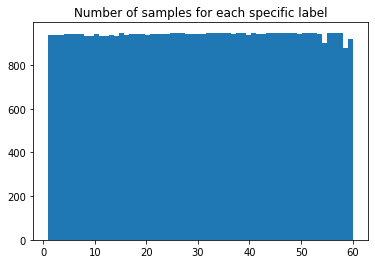

In [527]:
plt.hist(label, bins=cat_target.shape[-1])
plt.title("Number of samples for each specific label")
plt.show()

#Visualization of a specific label

In [648]:
def rotate(matrix, degree):

  radian = (degree * np.pi) / 180

  rx = np.array([[1, 0, 0], 
                 [0, np.cos(radian), -np.sin(radian)],
                 [0, np.sin(radian), np.cos(radian)]])
    
  return np.dot(rx, matrix)

In [649]:
def savingRule(num):

    alphabets = 'abcdefghijklmnopqrstuvwxyz'
    numbers = '0123456789'
    len_up = len(alphabets) * len(numbers)
    len_down = len(numbers)

    lft1, num = num // len_up, num % len_up

    lft2, lft3 = num // len_down, num % len_down

    name = alphabets[lft1] + alphabets[lft2] + numbers[lft3]

    return name

In [650]:
def makeGIF(name, duration):

  fp_in = "*_plot.png"
  fp_out = name + ".gif"

  img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]

  img.save(fp=fp_out, format='GIF', append_images=imgs,
          save_all=True, duration=duration, loop=0)

In [651]:
def visualize(file_number=0, verbose=True):

  for frn in range(bd1.shape[1]):

    body = bd1[file_number, frn, :].reshape(5, 3).T
    right_hand = rh1[file_number, frn, :].reshape(6, 3).T
    left_hand = lh1[file_number, frn, :].reshape(6, 3).T
    right_foot = rf1[file_number, frn, :].reshape(4, 3).T
    left_foot = lf1[file_number, frn, :].reshape(4, 3).T

    degree = 105

    body = rotate(body, degree).T
    right_hand = rotate(right_hand, degree).T
    left_hand = rotate(left_hand, degree).T
    right_foot = rotate(right_foot, degree).T
    left_foot = rotate(left_foot, degree).T

    x1, y1, z1 = body[:, 0], body[:, 1], body[:, 2]
    x2, y2, z2 = right_hand[:, 0], right_hand[:, 1], right_hand[:, 2]
    x3, y3, z3 = left_hand[:, 0], left_hand[:, 1], left_hand[:, 2]
    x4, y4, z4 = right_foot[:, 0], right_foot[:, 1], right_foot[:, 2]
    x5, y5, z5 = left_foot[:, 0], left_foot[:, 1], left_foot[:, 2]

    if (body == np.zeros(body.shape)).all():

      break
    
    fig = plt.figure(figsize = (12, 8))
    ax = plt.axes(projection ="3d")
    ax.set_facecolor("white")

    ax.plot(y1, x1, z1, color = "green", marker='o')
    ax.plot(y2, x2, z2, color = "red", marker='o')
    ax.plot([y1[2], y2[0]], [x1[2], x2[0]], [z1[2], z2[0]], color='red')
    ax.plot(y3, x3, z3, color = "blue", marker='o')
    ax.plot([y1[2], y3[0]], [x1[2], x3[0]], [z1[2], z3[0]], color= 'blue')
    ax.plot(y4, x4, z4, color = "black", marker='o')
    ax.plot([y1[0], y4[-1]], [x1[0], x4[-1]], [z1[0], z4[-1]], color= 'black')
    ax.plot(y5, x5, z5, color = "orange", marker='o')
    ax.plot([y1[0], y5[-1]], [x1[0], x5[-1]], [z1[0], z5[-1]], color= 'orange')

    plt.grid(b=False)
    plt.xlim(-4, -3)
    plt.ylim(-1.5, +1.5)
    plt.title(f"Label:{label_list[int(label[file_number])]}, Frame:{frn+1}")
    plt.savefig(f'{label_list[int(label[file_number])]}_{savingRule(frn)}_plot.png')

    if not verbose:
      plt.close(fig)
      
    plt.show()

  makeGIF(name=f"{label_list[int(label[file_number])]}", duration=250)

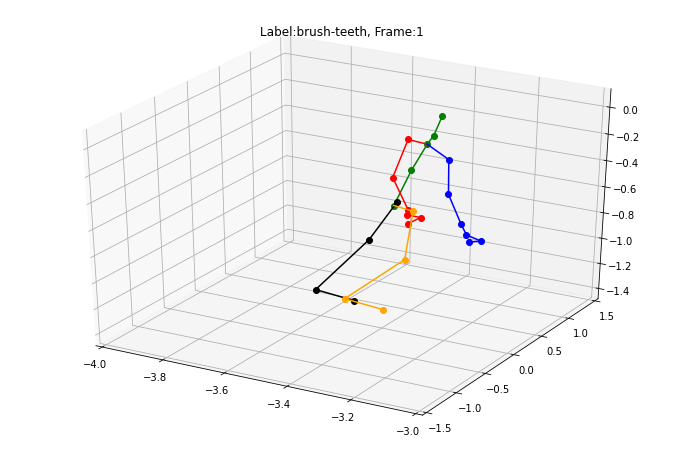

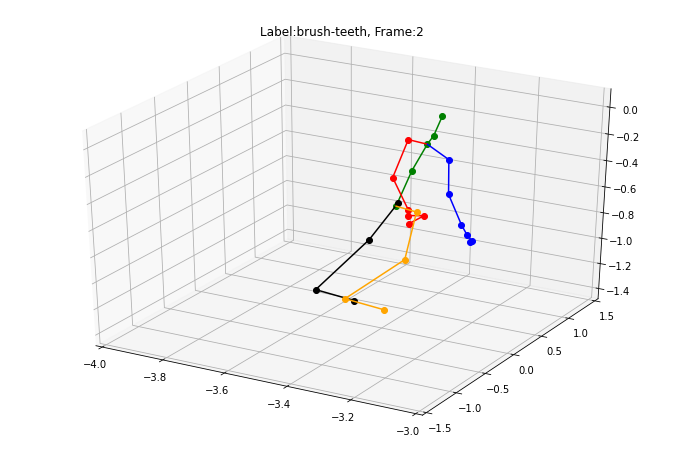

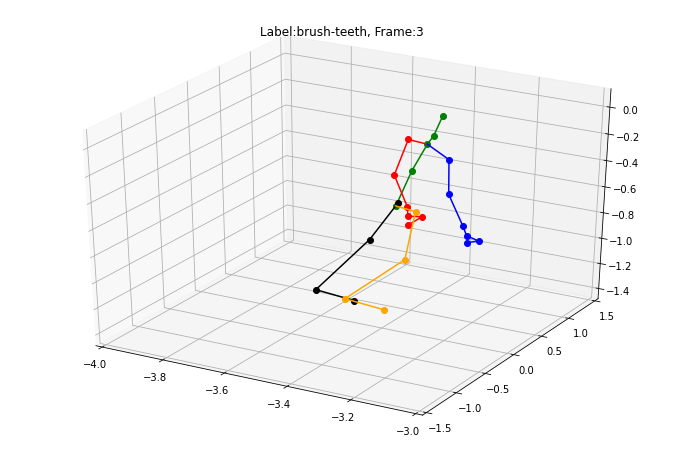

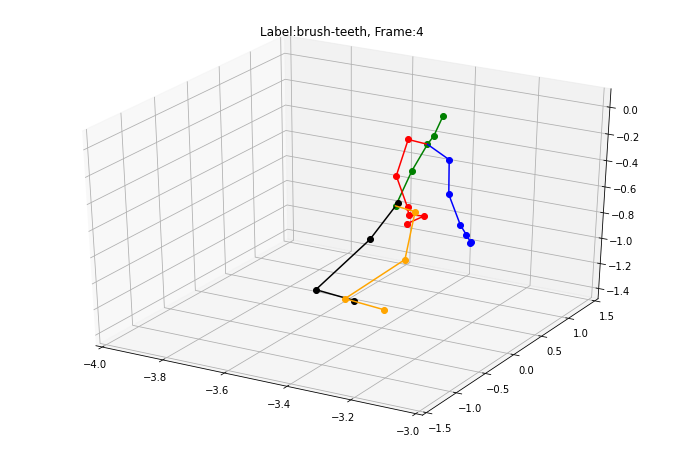

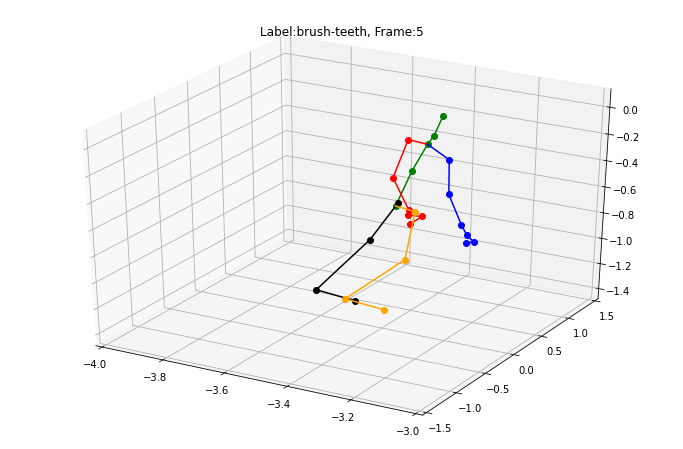

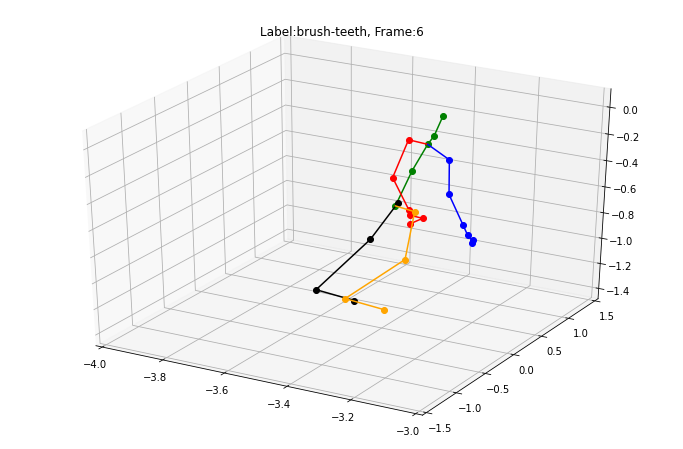

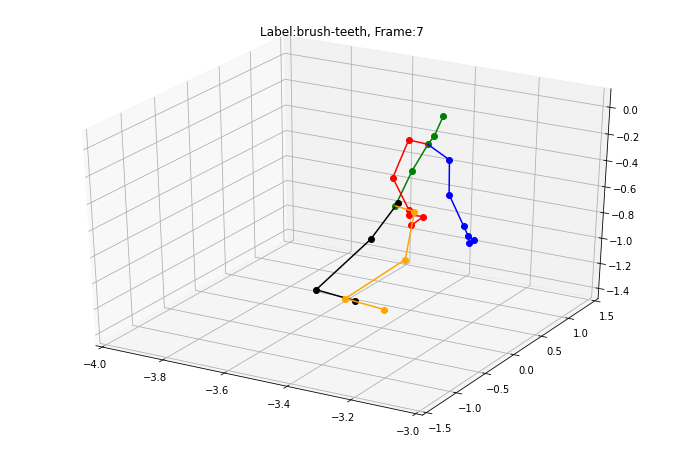

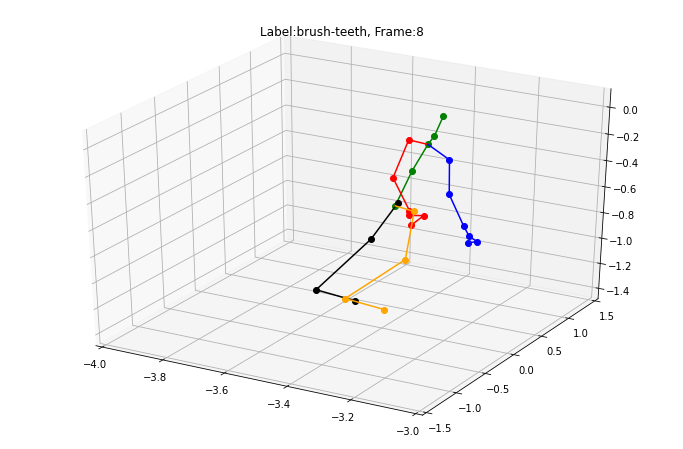

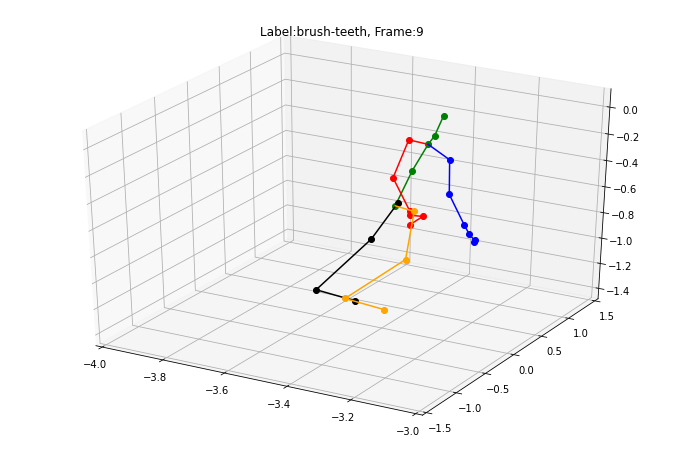

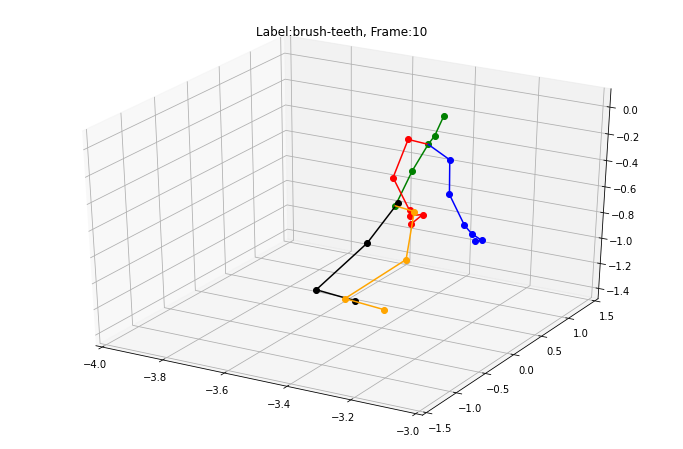

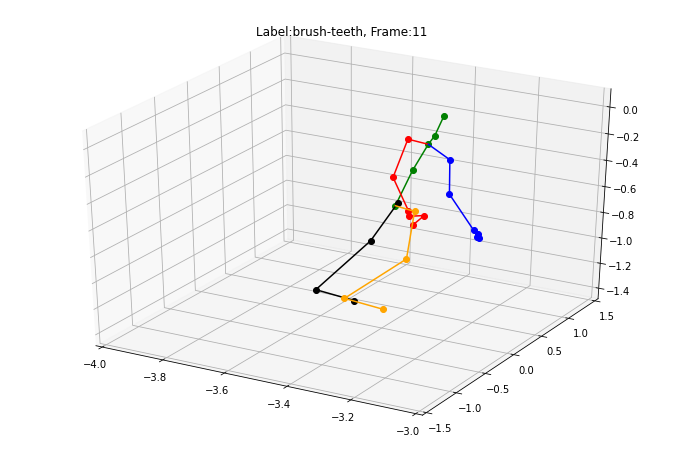

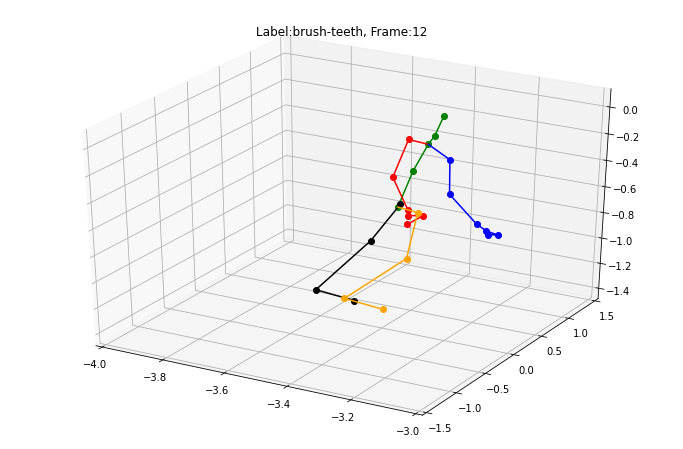

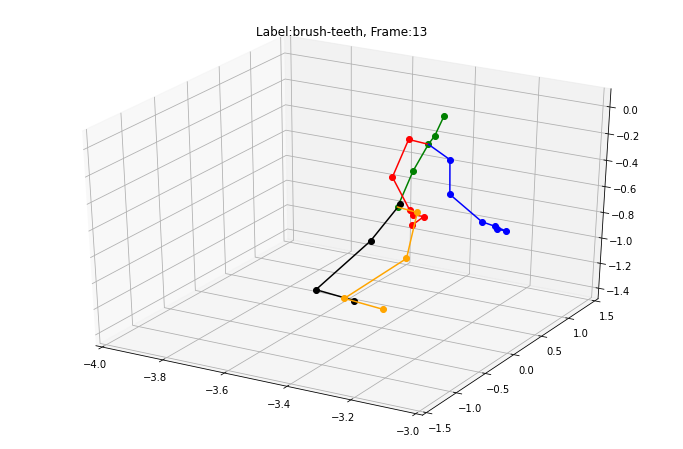

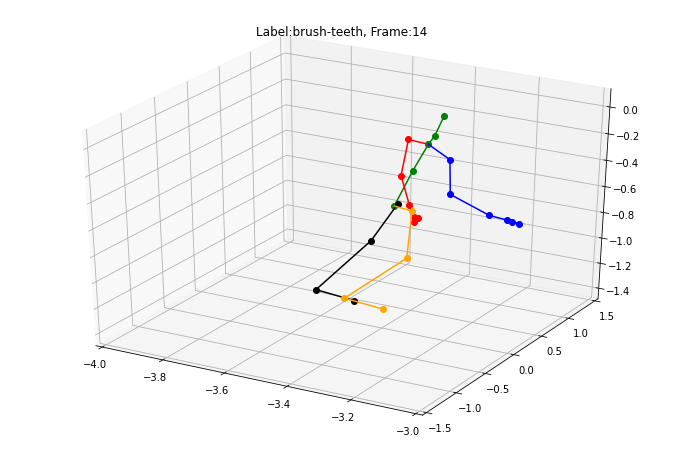

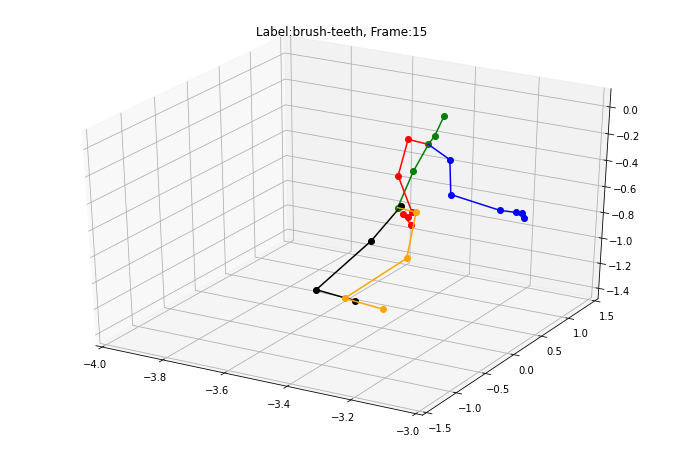

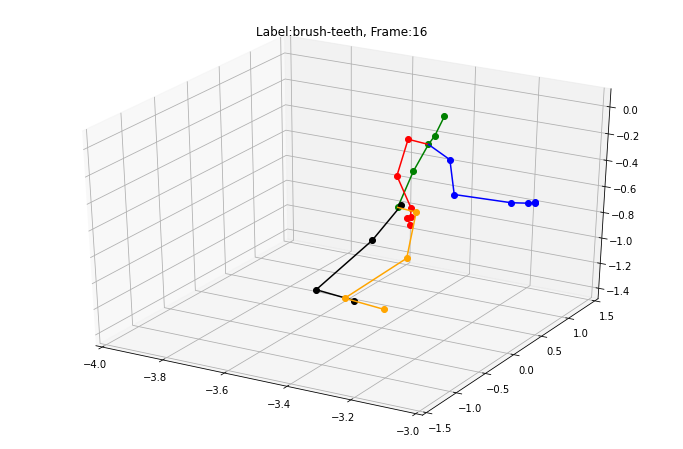

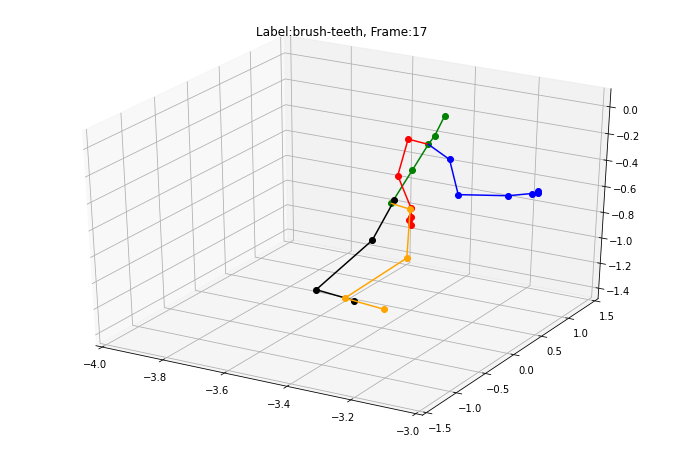

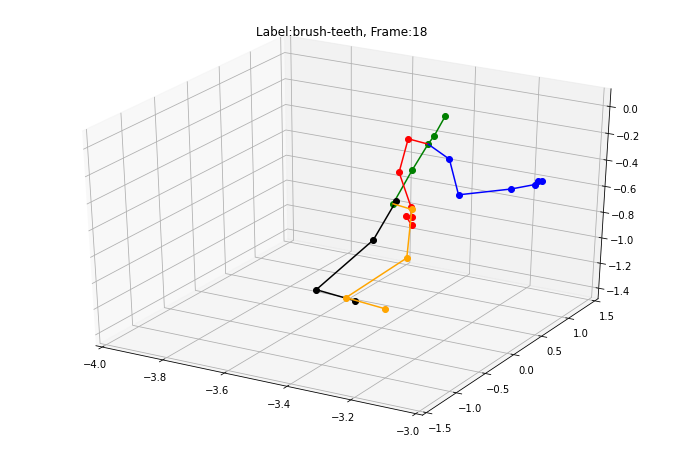

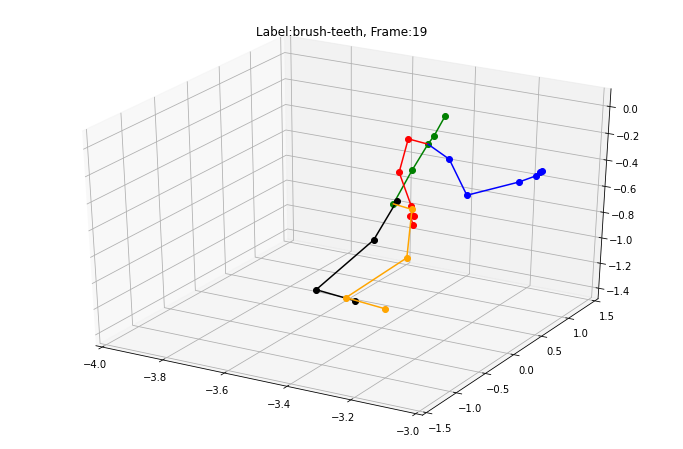

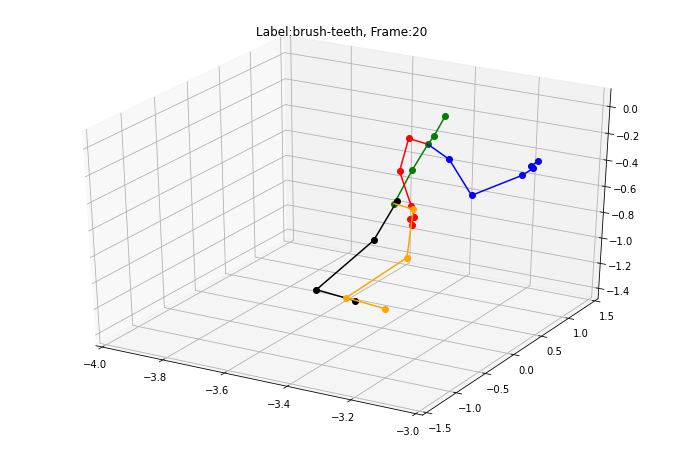

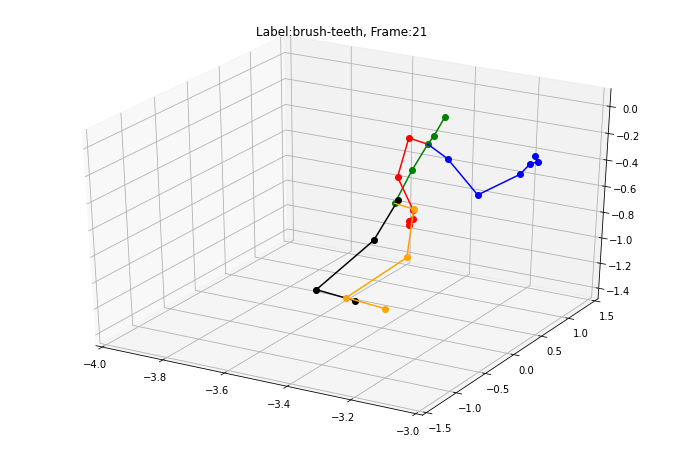

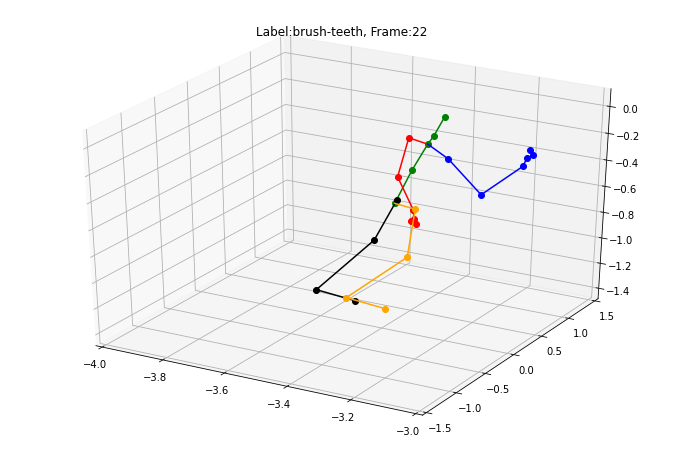

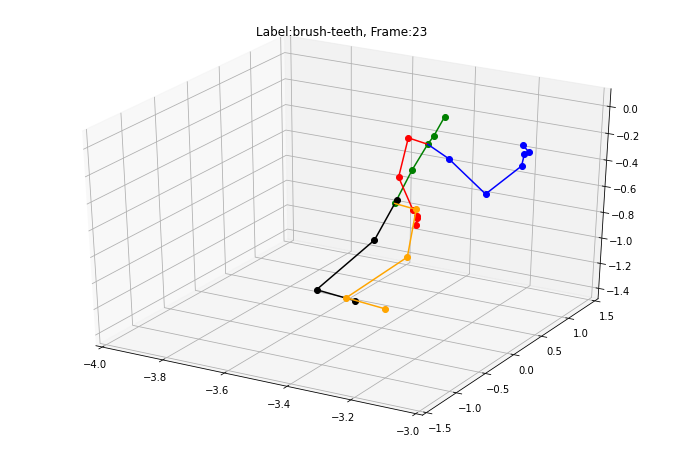

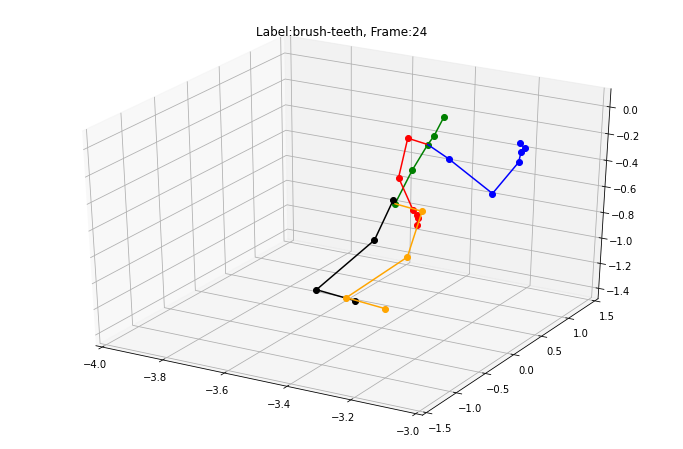

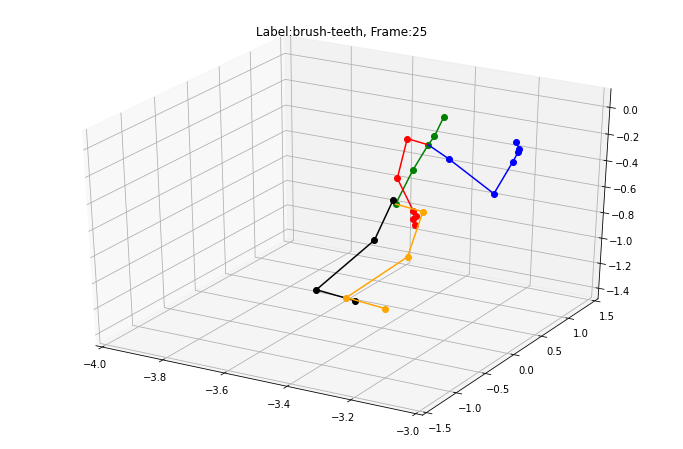

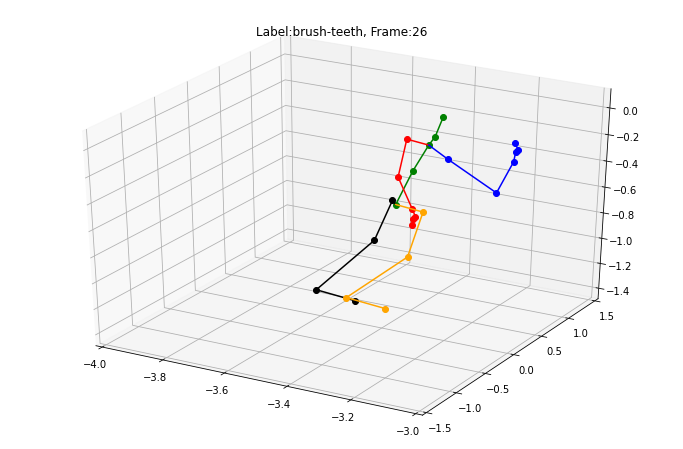

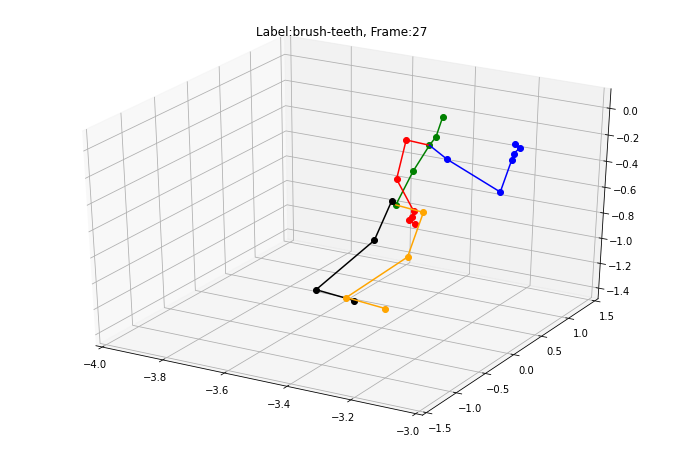

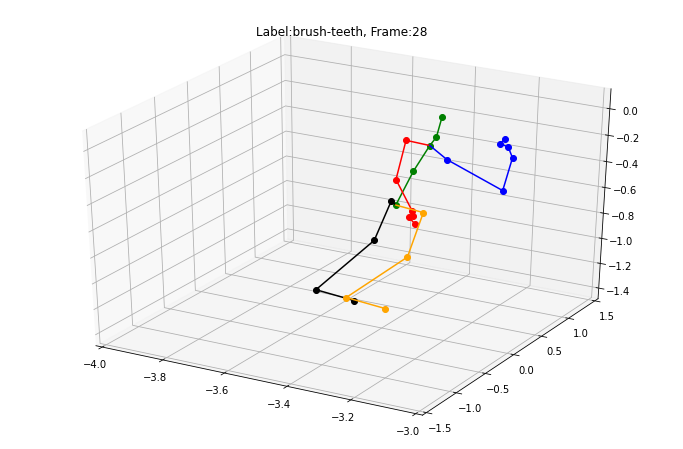

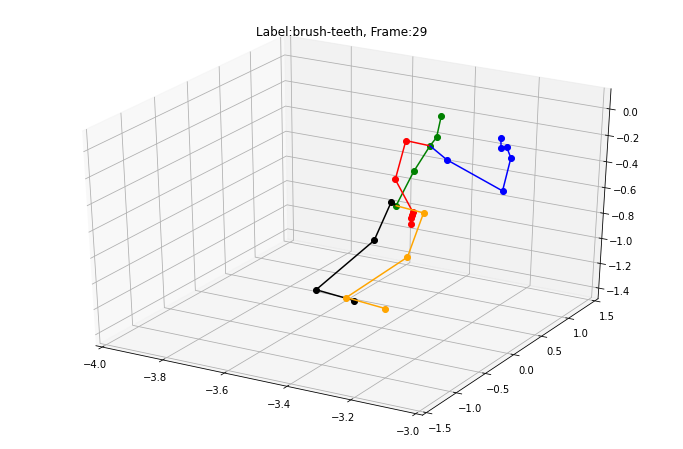

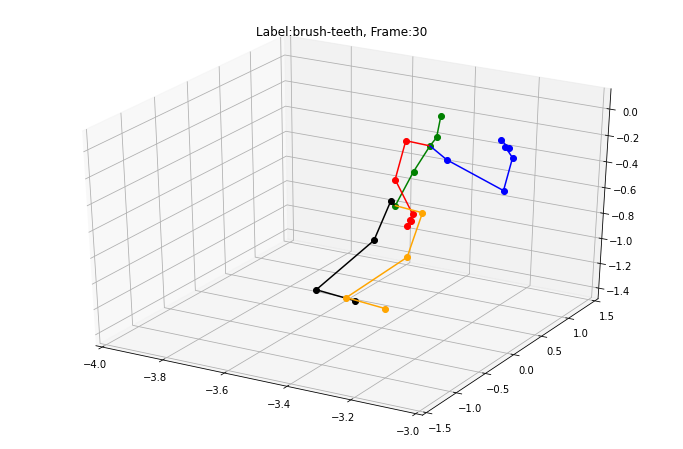

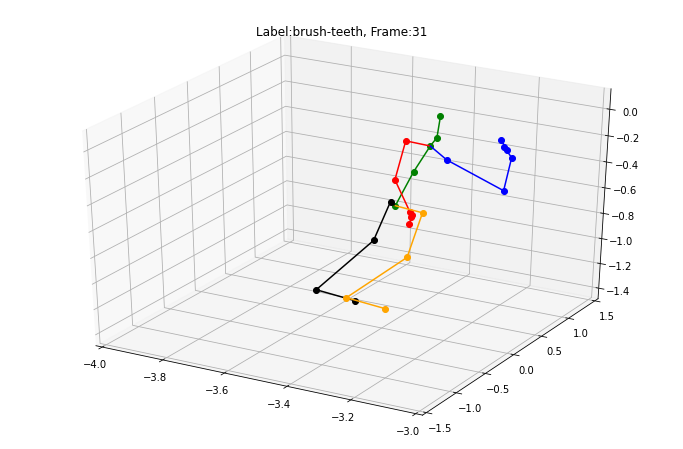

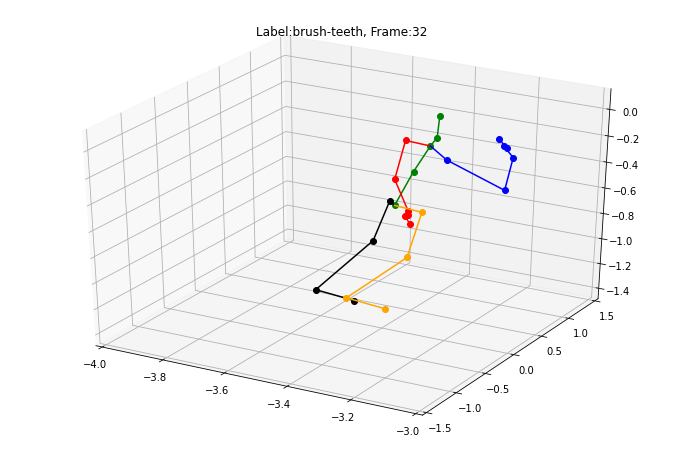

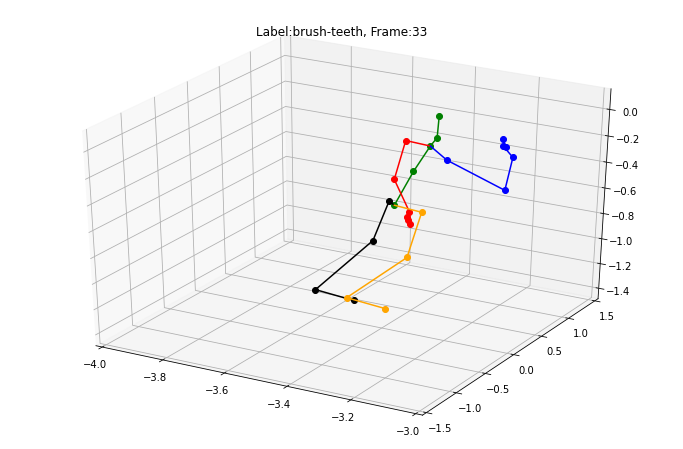

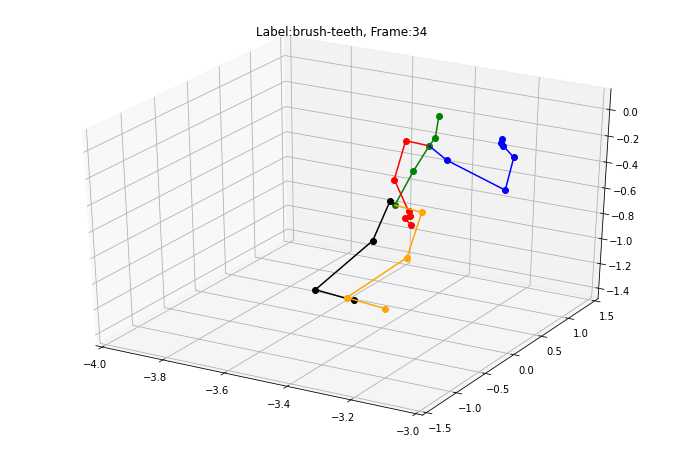

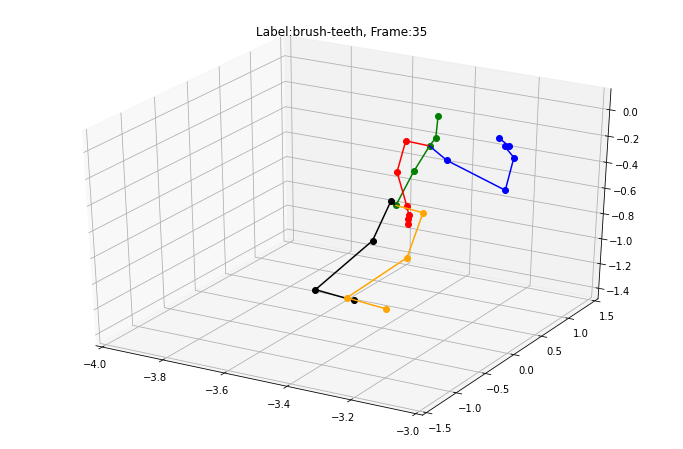

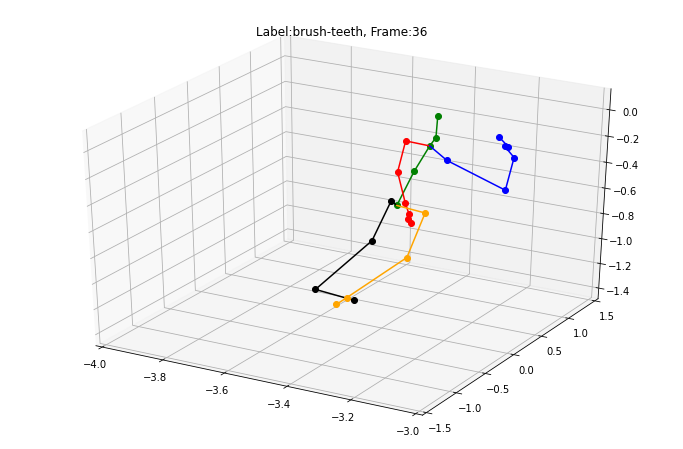

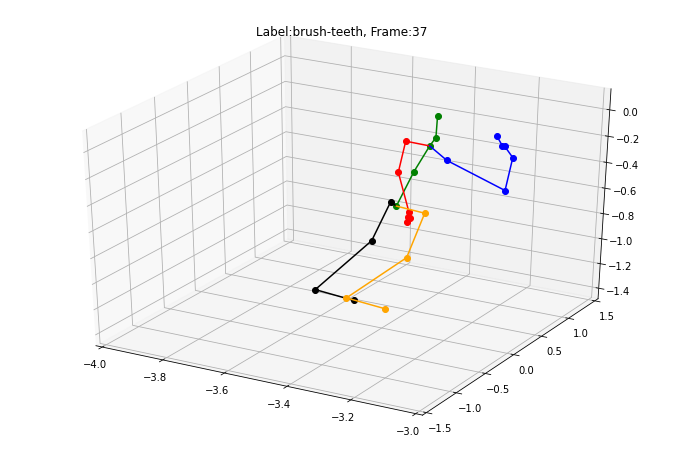

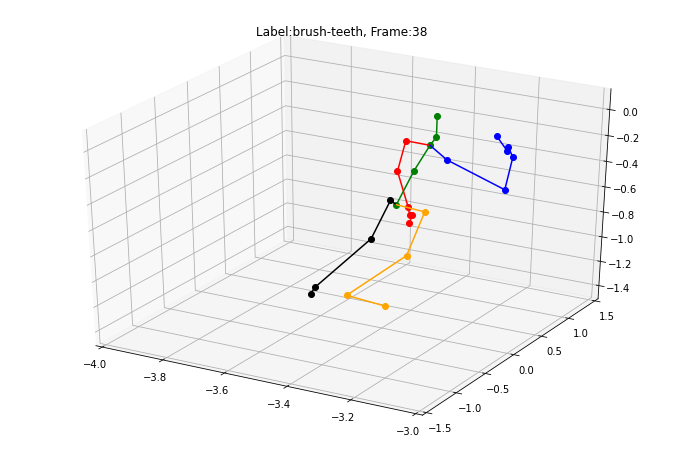

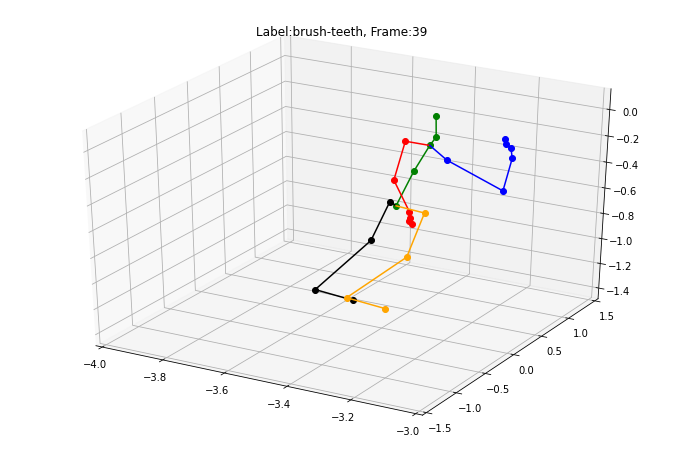

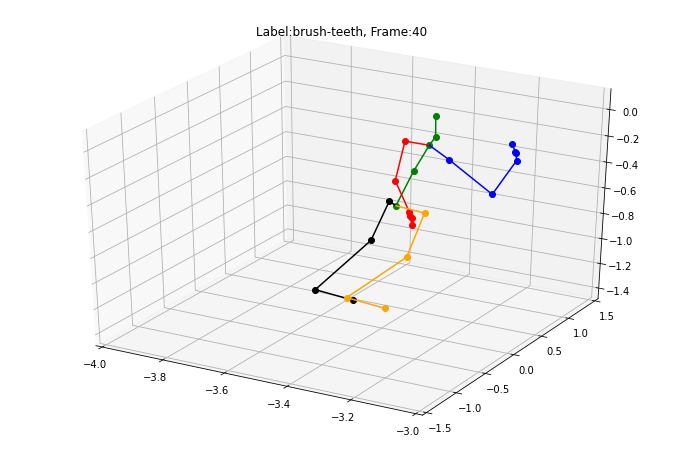

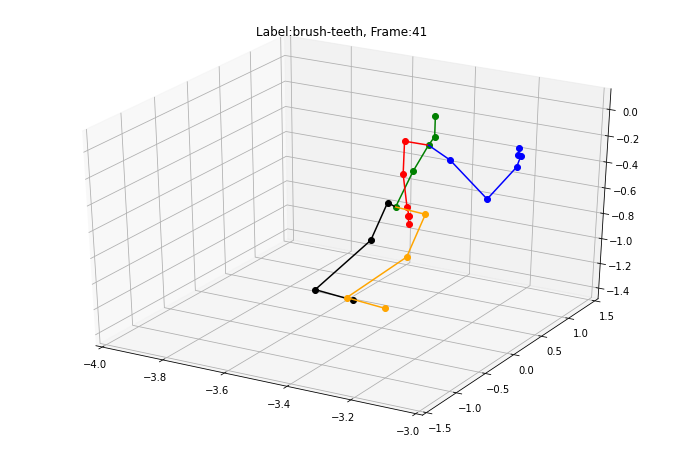

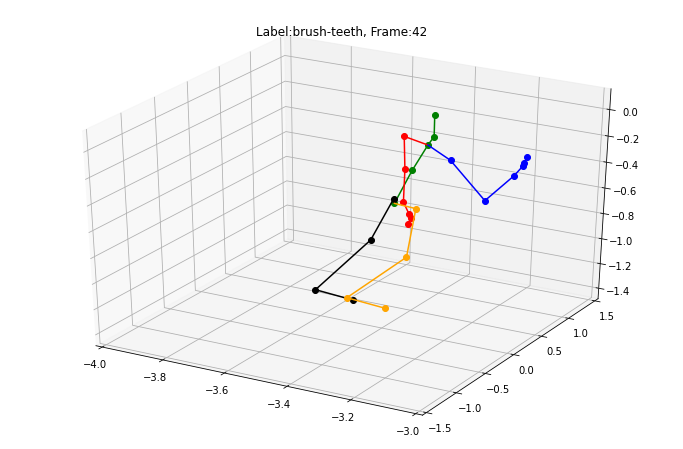

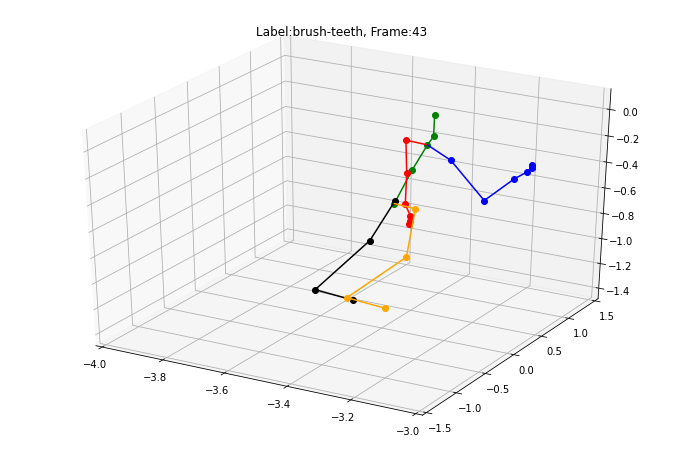

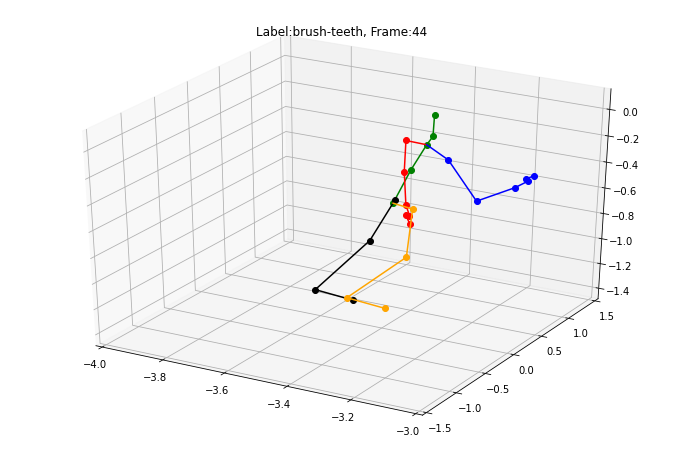

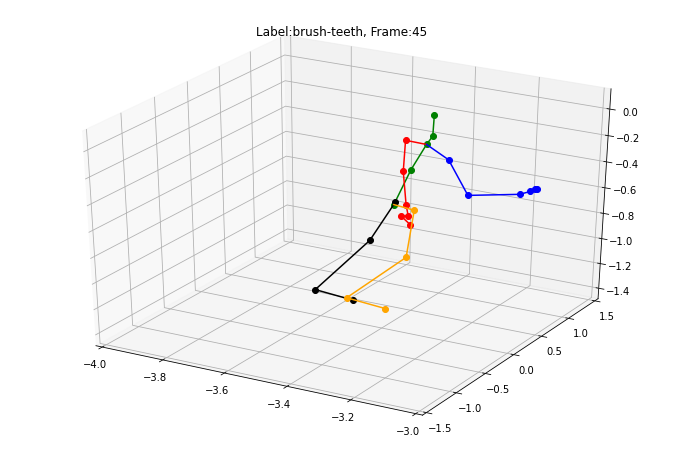

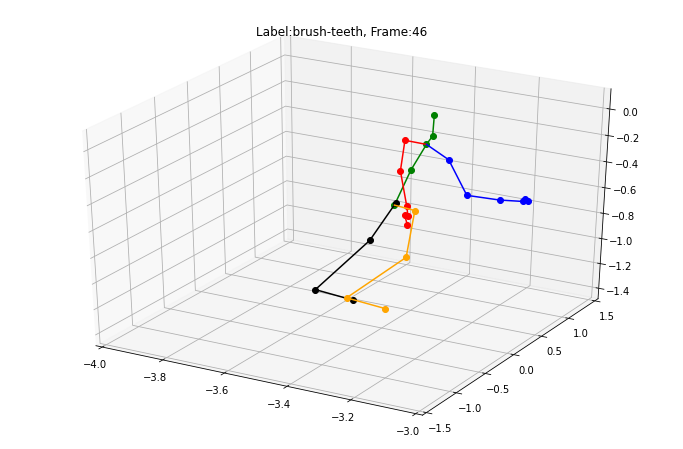

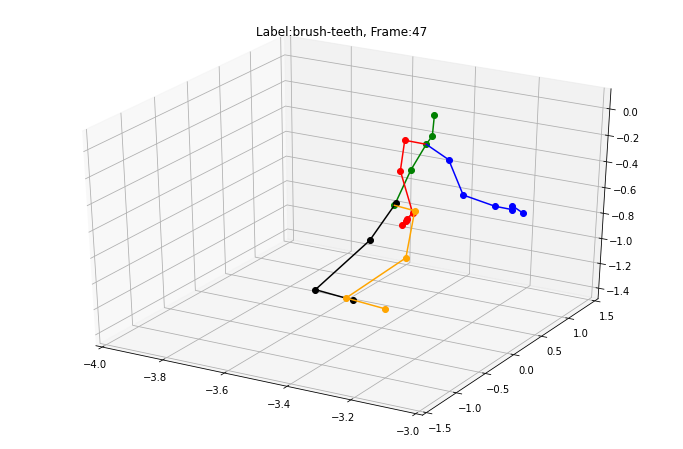

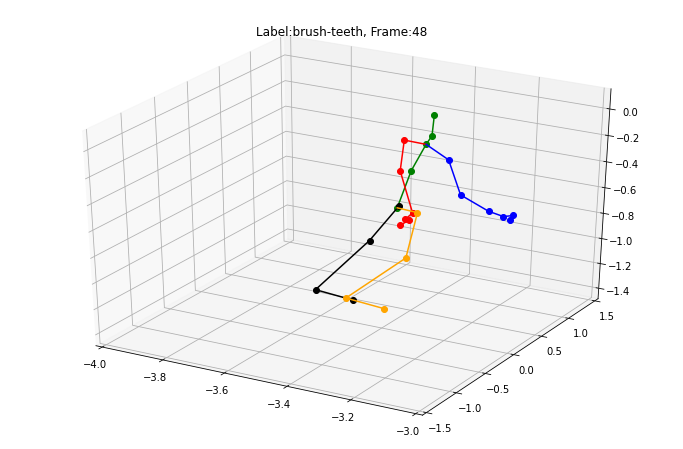

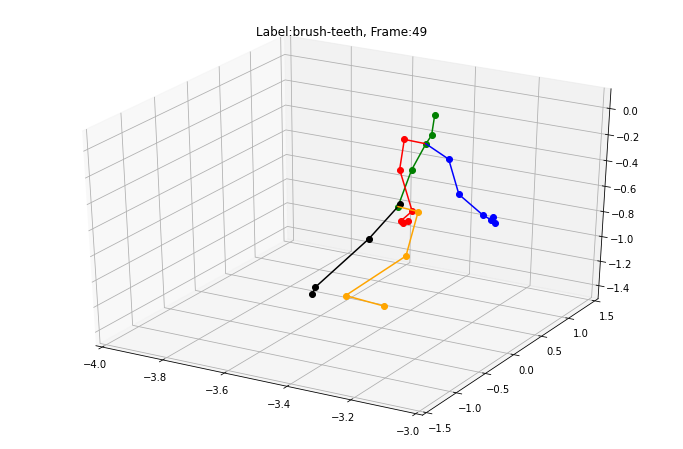

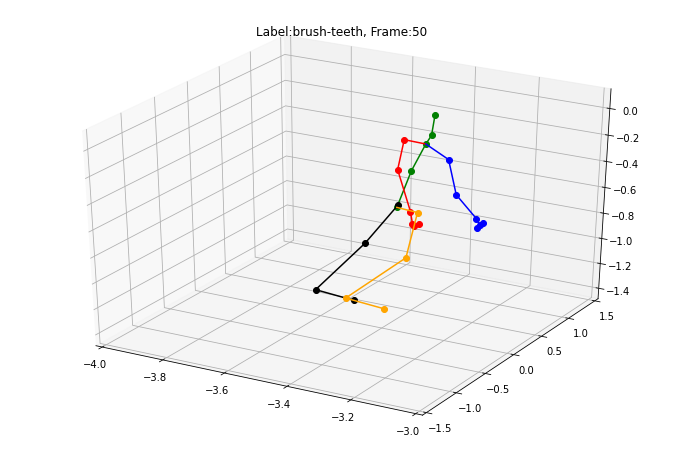

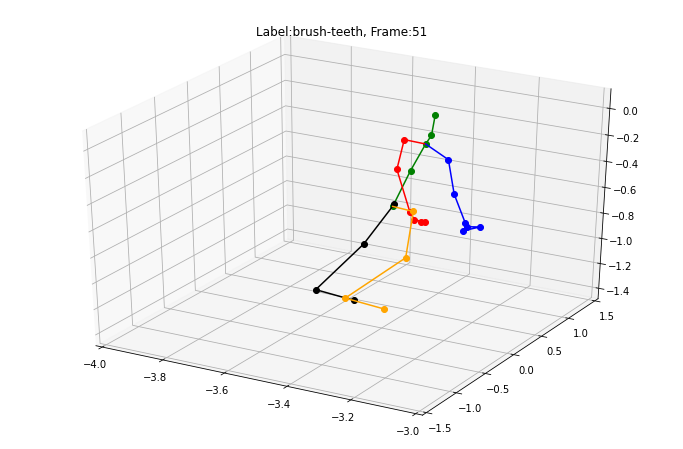

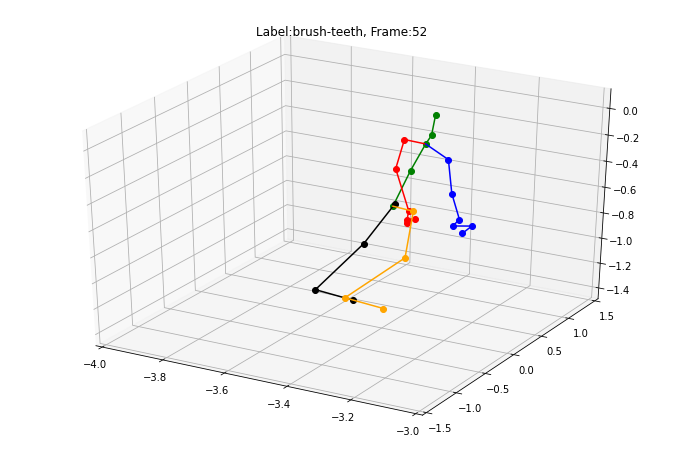

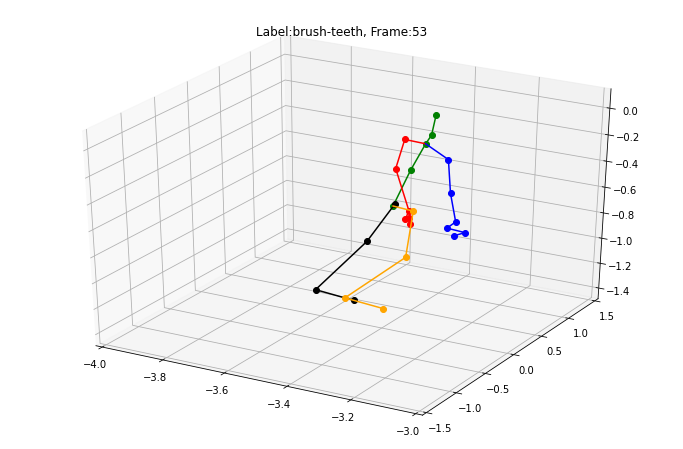

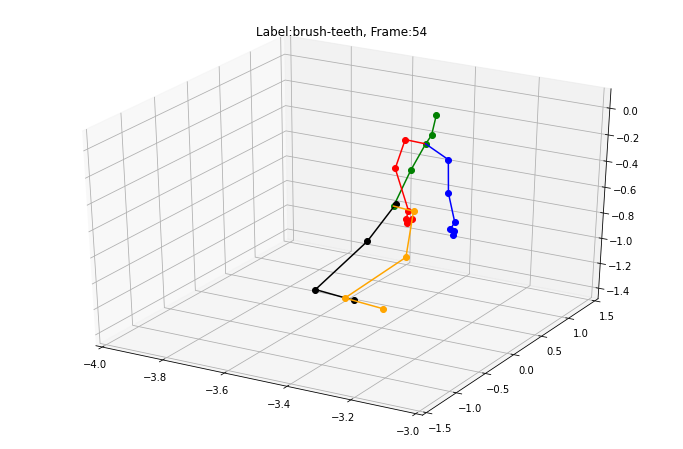

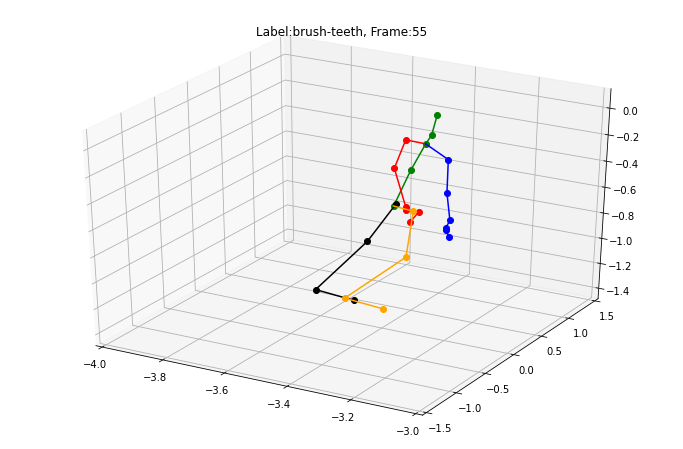

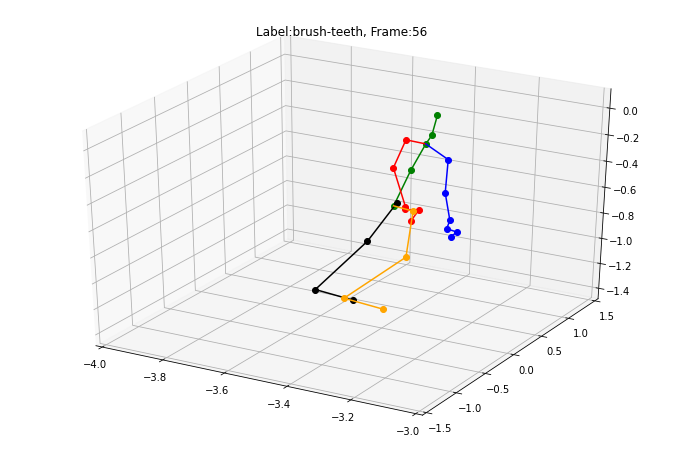

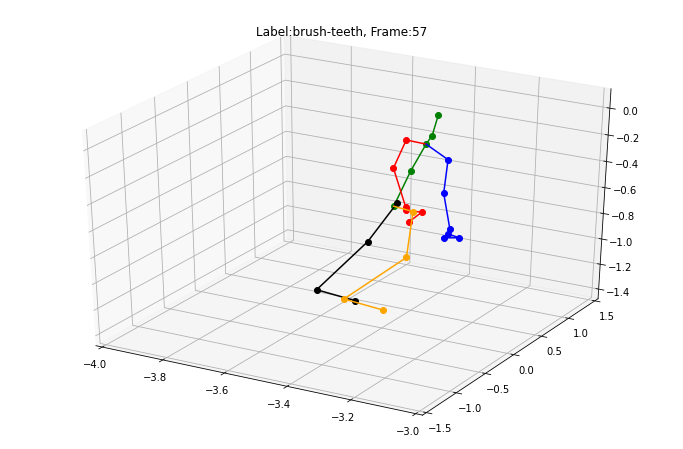

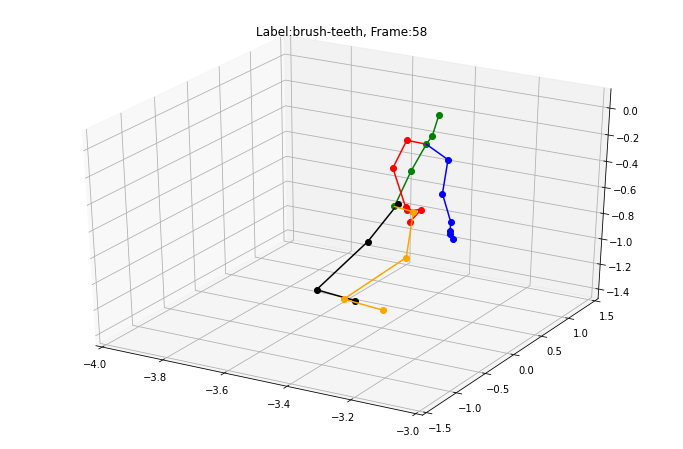

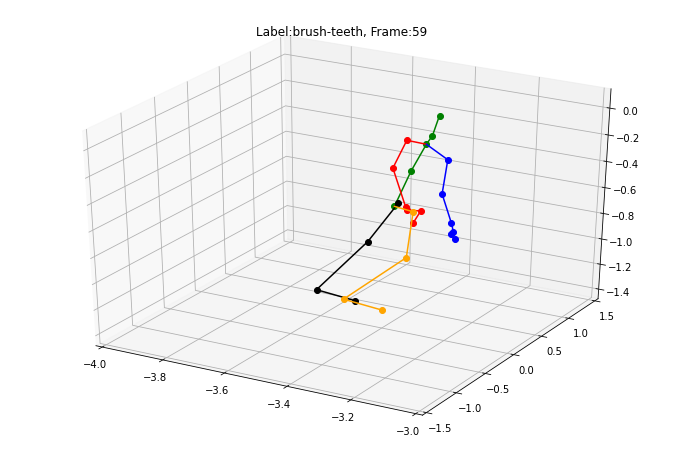

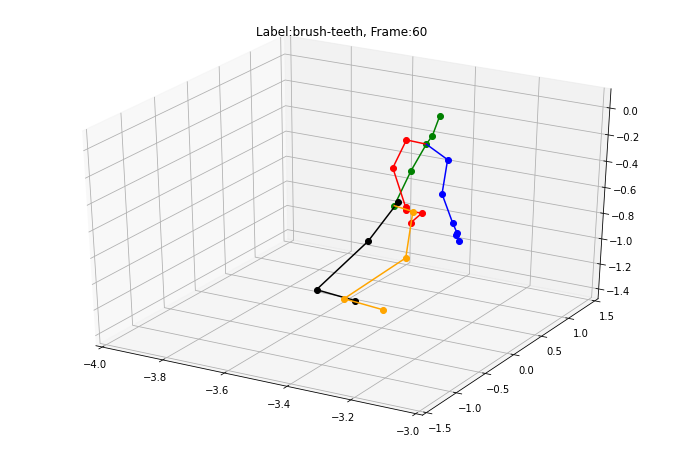

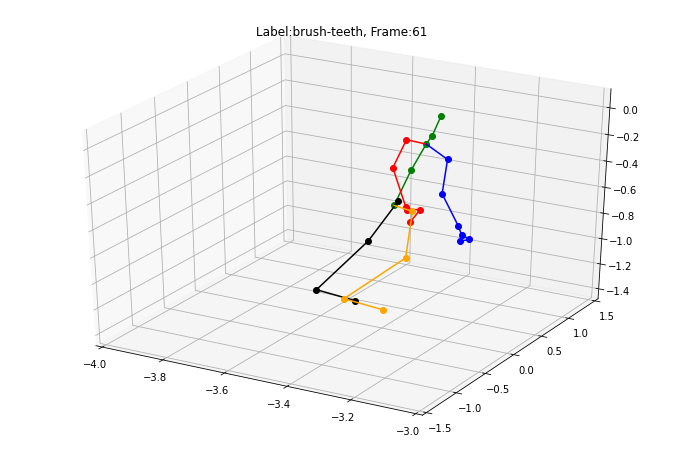

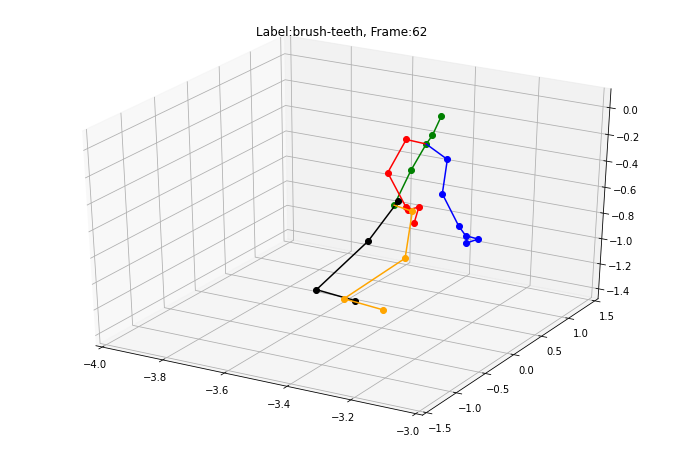

In [652]:
visualize(file_number=45802, verbose=True)

#Visualization of all labels

In [659]:
def generate_gif_file_for_each_label():

  for idx in range(len(label_list)-1):

    visualize(file_number=idx, verbose=False)

    os.system('rm -f *.png')

In [660]:
generate_gif_file_for_each_label()